## 0. Importações

In [161]:
import pandas as pd
import matplotlib.pyplot as plt


In [162]:
df = pd.read_csv('C:\\Users\\Cliente\\Documents\\Git\\case\\docs\\parfum_sales.csv')
df

,brand,title,type,price,available,sold,total_sale,country,state,city,month,day,year,date,weekday,is_weekend
0,Carolina Herrera,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Eau de Parfum,43.99,2,393,17288.07,United States,Alabama,Thomasville,5.0,23,2024,2024-05-23,Thursday,0
1,As Shown,Parfums de Marly Delina La Rosee Eau de Parfum...,Eau de Parfum,79.99,5,40,3199.60,Hong Kong,New Jersey,New Jersey,5.0,24,2024,2024-05-24,Friday,0
2,PRADA,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Eau de Parfum,59.99,10,35,2099.65,United States,New Jersey,Orange,5.0,14,2024,2024-05-14,Tuesday,0
3,As Show,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Eau de Parfum,59.99,10,9,539.91,Hong Kong,New Jersey,USA,5.0,23,2024,2024-05-23,Thursday,0
4,Viktor & Rolf,Flowerbomb by Viktor & Rolf 3.4 oz 100ML Eau D...,Eau de Parfum,51.99,8,184,9566.16,United States,Michigan,Warren,5.0,23,2024,2024-05-23,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,GUESS,Guess 1981 by Guess cologne for men EDT 3.3 / ...,Eau de Toilette,20.28,45,1613,32711.64,United States,Texas,Dallas,5.0,24,2024,2024-05-24,Friday,0
1870,Armaf,Club de Nuit Intense by Armaf cologne for men ...,Eau de Toilette,30.58,10,31,947.98,United States,Unknown,United States,5.0,23,2024,2024-05-23,Thursday,0
1871,Paco Rabanne,Invictus by Paco Rabanne for Men EDT Spray 3.4...,Eau de Toilette,39.99,2,305,12196.95,United States,New York,Jamaica,5.0,23,2024,2024-05-23,Thursday,0
1872,Lomani,"Lomani EDT Cologne 3.4 oz Men - Authentic, Bra...",Eau de Toilette,9.99,2,22,219.78,United States,Michigan,Lincoln Park,5.0,20,2024,2024-05-20,Monday,0


## 1. Visão Geral

In [163]:
# total de vendas por ano
sales_by_year = df.groupby(df['year'])['sold'].sum().reset_index()
sales_by_year.columns = ['Year', 'Total Sales']
sales_by_year

,Year,Total Sales
0,2022,120
1,2023,499
2,2024,1249007


In [164]:
rows_per_year = df.groupby('year').size().reset_index(name='Row Count')
rows_per_year

,year,Row Count
0,2022,2
1,2023,5
2,2024,1867


A quantidade de dados de 2022 e 2023 é risória, sendo assim, eles serão removidos da análise.

In [165]:
df = df[df['year'] == 2024]

In [166]:
rows_per_month = df.groupby('month').size().reset_index(name='Row Count')
rows_per_month

,month,Row Count
0,1.0,5
1,2.0,21
2,3.0,29
3,4.0,88
4,5.0,1723


In [167]:
# df = df[df['month'] == 5]

In [168]:
## 2. Análise de dados

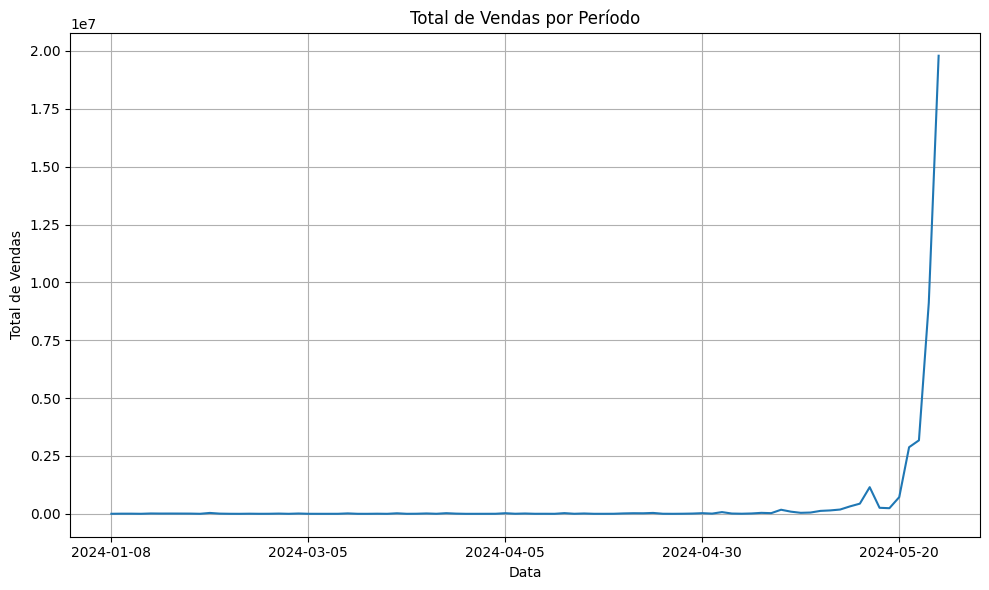

In [169]:
df.groupby('date')['total_sale'].sum().plot(
    kind='line',
    title='Total de Vendas por Período',
    xlabel='Data',
    ylabel='Total de Vendas',
    figsize=(10, 6)
)

plt.grid()
plt.tight_layout()
plt.show()

um aumento exponencial aconteceu

In [170]:
#vendas por mes em 2024
sales_2024 = df[df['year'] == 2024]

sales_by_month_2024 = sales_2024.groupby('month')['sold'].sum().reset_index()
sales_by_month_2024.columns = ['Mês', 'Unidades Vendidas']
sales_by_month_2024

,Mês,Unidades Vendidas
0,1.0,1359
1,2.0,4188
2,3.0,4299
3,4.0,12114
4,5.0,1227047


In [171]:
# df = df[~((df['year'] == 2024) & (df['month'].isin([4, 5])))]

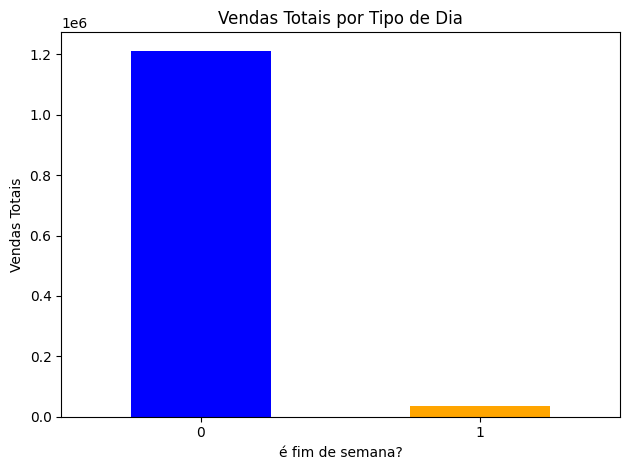

In [172]:
# Agrupando por is_weekend e calculando métricas
weekend_analysis = df.groupby('is_weekend').agg(
    total_sales=('sold', 'sum'),
    total_items=('available', 'sum'),
    avg_sales_per_item=('sold', 'mean')
).reset_index()

weekend_analysis.plot(
    x='is_weekend',
    y='total_sales',
    kind='bar',
    title='Vendas Totais por Tipo de Dia',
    legend=False,
    xlabel='é fim de semana?',
    ylabel='Vendas Totais',
    color=['blue', 'orange']
)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

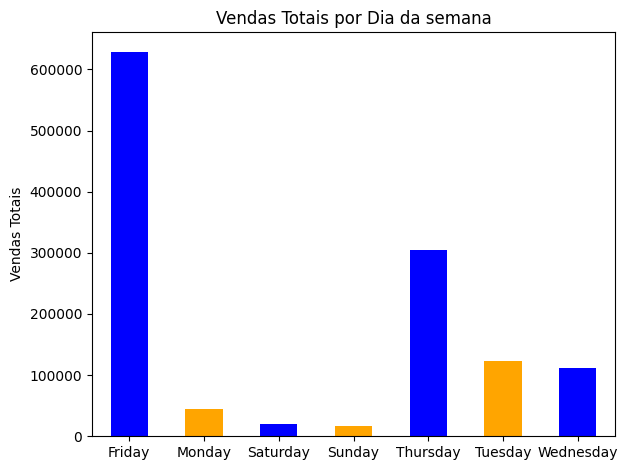

In [173]:
# Agrupando por is_weekend e calculando métricas
weekend_analysis = df.groupby('weekday').agg(
    total_sales=('sold', 'sum'),
    total_items=('available', 'sum'),
    avg_sales_per_item=('sold', 'mean')
).reset_index()

weekend_analysis.plot(
    x='weekday',
    y='total_sales',
    kind='bar',
    title='Vendas Totais por Dia da semana',
    legend=False,
    xlabel='',
    ylabel='Vendas Totais',
    color=['blue', 'orange']
)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

A maior parte das vendas é feitas entre quinta e sexta-feira

Average Availability: 19.00
Average Sold: 668.99


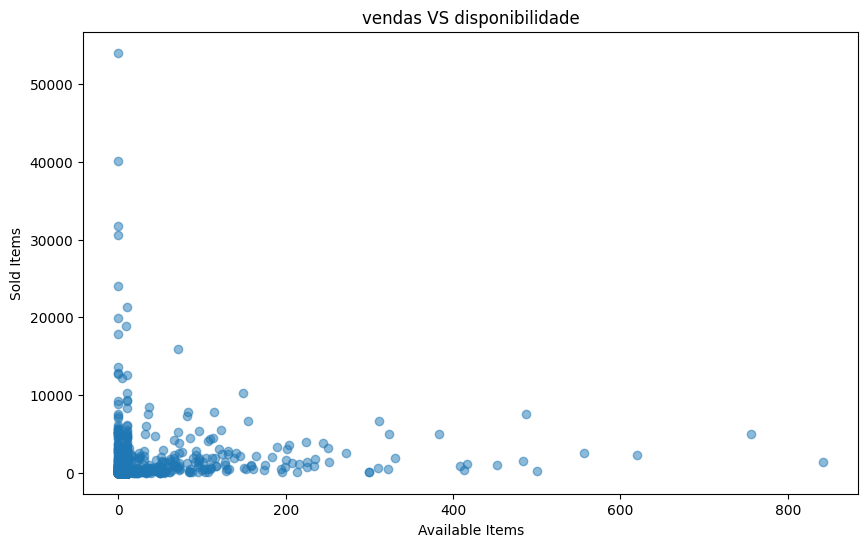

In [174]:
# vendas VS disponibilidade
available_avg = df['available'].mean()
sold_avg = df['sold'].mean()

print(f"Average Availability: {available_avg:.2f}")
print(f"Average Sold: {sold_avg:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(df['available'], df['sold'], alpha=0.5)
plt.xlabel('Available Items')
plt.ylabel('Sold Items')
plt.title('vendas VS disponibilidade')
plt.show()

<Axes: title={'center': 'Top 10 Estados com Mais Vendas'}, xlabel='state'>

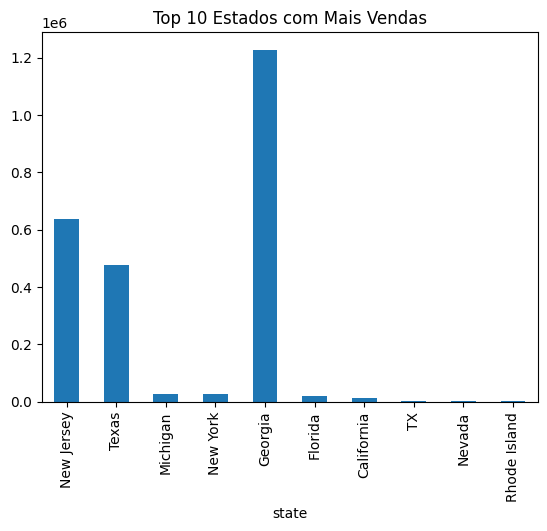

In [175]:
df.groupby(['month', 'year'])['sold'].sum().plot(kind='bar', title='Vendas por Mês')
df.groupby('state')['sold'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Estados com Mais Vendas')

In [176]:
georgia_friday_sales = df[(df['state'] == 'Georgia') & (df['weekday'].isin(['Friday', 'Thursday']))]['sold'].sum()

total_sales = df['sold'].sum()

percentage = (georgia_friday_sales / total_sales) * 100
print(f"{percentage:.2f}% das vendas foram feitas na Georgia entre quinta e sexta")

0.19% das vendas foram feitas na Georgia entre quinta e sexta


In [177]:
#  os 3 produtos mais vendidos
top3_sold = df.groupby('title', as_index=False)['sold'].sum().nlargest(3, 'sold')
total_sold= df['sold'].sum()

top3_sold['taxa'] = (top3_sold['sold'] / total_sold) * 100

top3_sold

,title,sold,taxa
396,Ck One by Calvin Klein Cologne Perfume Unisex ...,54052,4.327598
448,Cool Water by Davidoff 4.2 oz EDT Cologne for ...,40394,3.234089
1673,Versace Eros by Gianni Versace 3.4 oz EDT Colo...,31718,2.539457


In [178]:
#  os 3 produtos mais vendidos
top3_invoicing = df.groupby('title', as_index=False)['total_sale'].sum().nlargest(3, 'total_sale')
total_invoincing = df['total_sale'].sum()

# a taxa de participação nas vendas totais
top3_invoicing['taxa'] = (top3_invoicing['total_sale'] / total_invoincing) * 100

top3_invoicing

,title,total_sale,taxa
392,Chrome by Azzaro 6.7 / 6.8 oz EDT Cologne for ...,1420246.15,3.581902
396,Ck One by Calvin Klein Cologne Perfume Unisex ...,1291302.28,3.256702
1673,Versace Eros by Gianni Versace 3.4 oz EDT Colo...,1261424.86,3.181350


In [179]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df.to_csv('C:\\Users\\Cliente\\Documents\\Git\\case\\docs\\parfum_sales.csv', index=False)

C:\Users\Cliente\AppData\Local\Temp\ipykernel_12892\2100927036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
